In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [30]:
pd.set_option("display.max_rows", 5)
titanic = pd.read_csv('../datasets/train_and_test2.csv', index_col=0)
print("Setup Completed")
titanic.head()

Setup Completed


,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Passengerid,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
2,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
3,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
4,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
5,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [31]:
titanic.rename(columns={"2urvived": "Survived"}, inplace=True)

In [32]:
print(titanic.columns)

Index(['Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3',
       'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9',
       'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass',
       'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', 'Survived'],
      dtype='object')


In [39]:
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
correlation_matrix = df[['age','fare','survived']].corr()

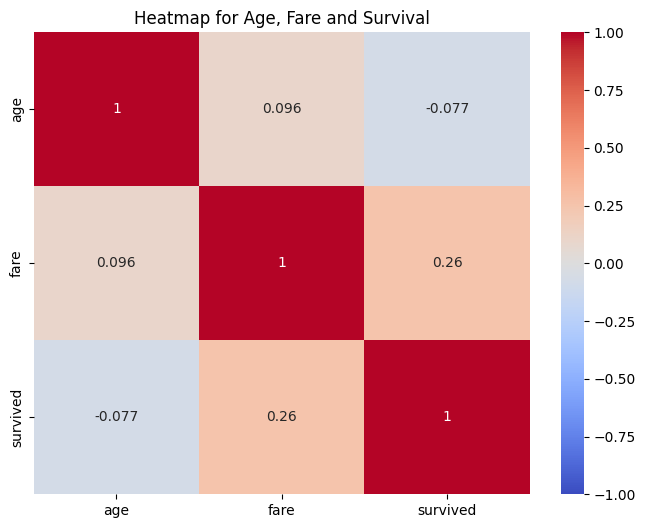

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap for Age, Fare and Survival")
plt.show()

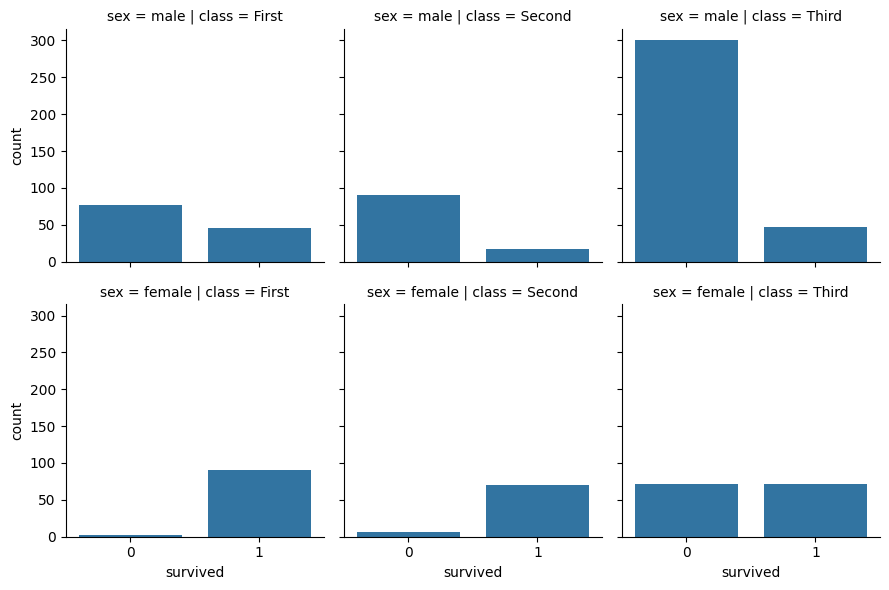

In [41]:
#Then create a FacetGrid showing survival rates broken down by Class and Sex.

# This sets up a grid where rows are Sex (Male/Female) and columns are Class (1st/2nd/3rd)
g = sns.FacetGrid(df, col="class" , row="sex")

# We map a "barplot" onto the grid. 
# For Survival rates we use survived column
# Since 'survived' is 0 or 1, the average (height of the bar) equals the Survival Rate %.
# sns.barplot calculates the mean by default. Since survival is 0 (dead) or 1 (alive), the mean is exactly the survival rate.

#ERROR: sns.barplot requires both an X and a Y value to calculate a mean, but you are only passing one variable ("survived").

# FIX: Use 'countplot' instead of 'barplot'
# This will draw two bars in each graph: one for 0 (Dead) and one for 1 (Alive)
g.map(sns.countplot, "survived", order=[0, 1])
plt.show()